## Titanic dataset

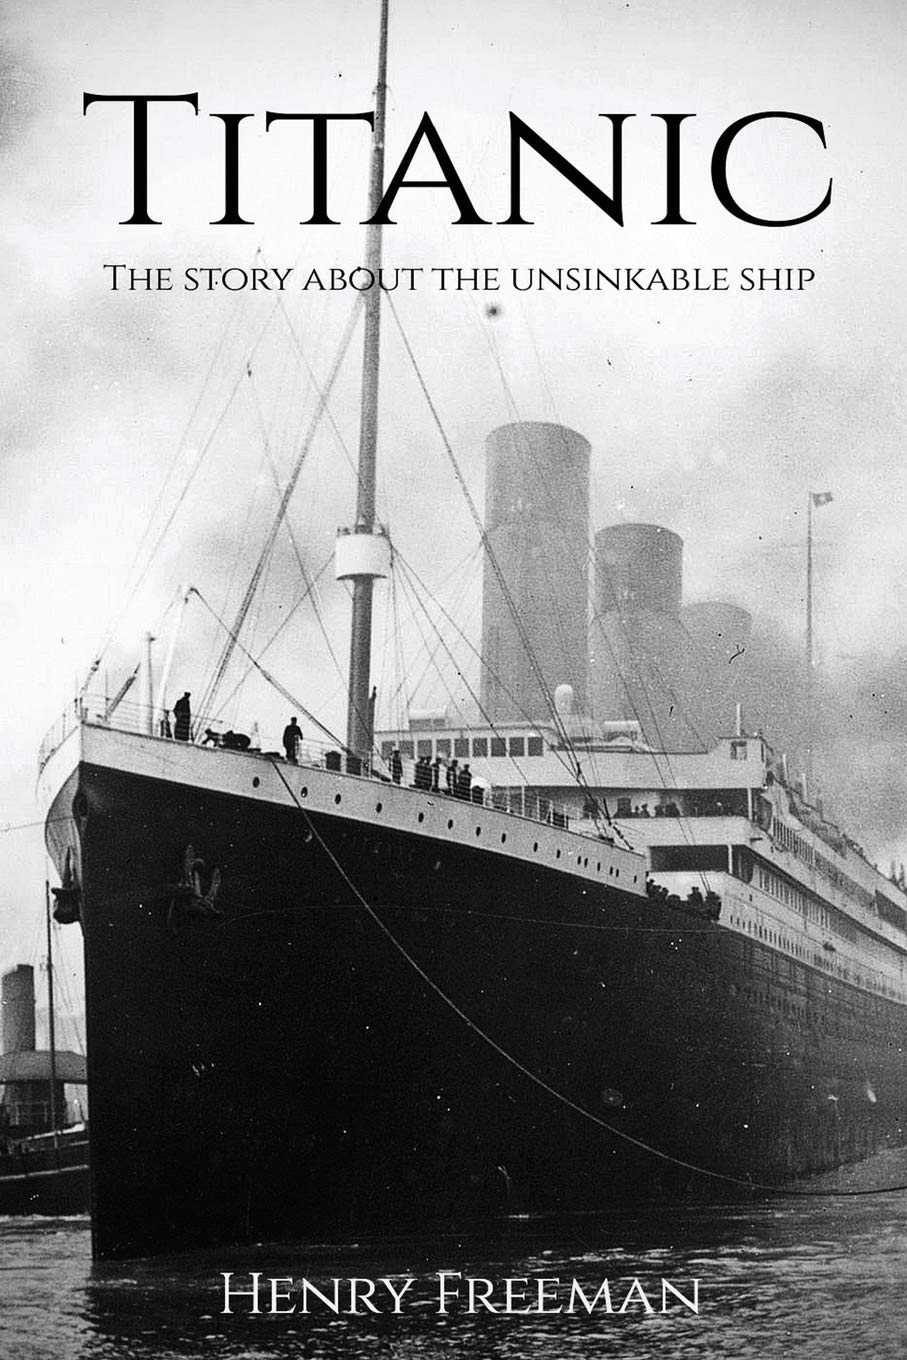

## The sinking of the Titanic is one of the most infamous shipwrecks in history.

* On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

* While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

* In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
#loading dataset
import pandas as pd
data = pd.read_csv("Titanic.csv")
pd.set_option("display.max_rows",None)
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

## task
* our task is find wheteher the person will be alive od died based on the given features
* inorder to solve this we use machine learning algorithms

## what is machine learning?
* Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts. Therefore, in Machine Learning, artificial knowledge is generated on the basis of experience.

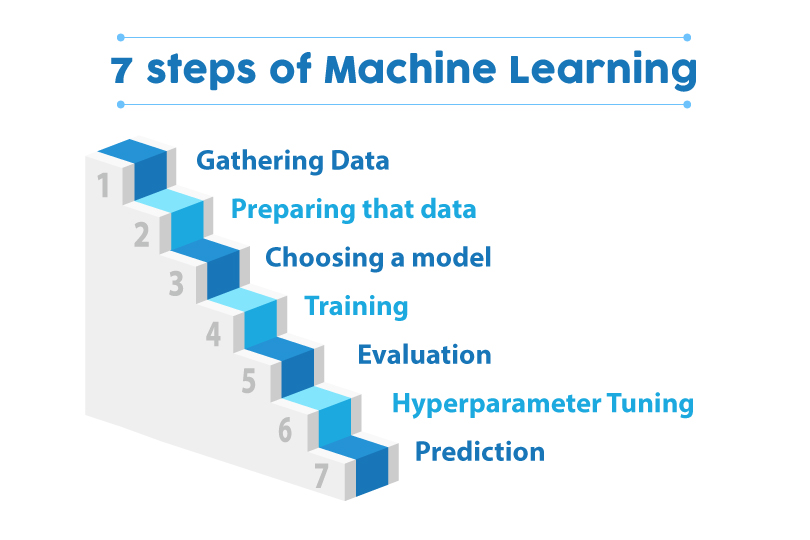

# sequence of solving the problem

## 1. Data analysing
## 2. explorative data analysation
## 3. filling null values
## 4. converting text to numerical
## 5. feature selection
## 6. model selection
## 7. model applying
## 8. hyper parameter tuning
## 9. final model

In [2]:
#lets see our data
for feature in data.columns:
    print("the data type of {} is {}".format(feature,data[feature].dtype))

the data type of PassengerId is int64
the data type of Survived is int64
the data type of Pclass is int64
the data type of Name is object
the data type of Sex is object
the data type of Age is float64
the data type of SibSp is int64
the data type of Parch is int64
the data type of Ticket is object
the data type of Fare is float64
the data type of Cabin is object
the data type of Embarked is object


In [3]:
#check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#lets see some statistical data
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
print("the shape of dataframe is:",data.shape)

the shape of dataframe is: (891, 12)


In [6]:
data[data["Age"].isnull()]

PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121          122         0       3   
126          127         0       3   
128          129         1       3   
140          141         0       3   
154          155         0       3   
158          159         0       3   
159          160         0       3   
166          167         1       1   
168          169         0       1   
176          177         0       3   
180          181         0       3   
181          182         0       2   
185          186         0       1   
186          187         1       3   
196          197         0       3   
198          199         1       3   
201          202         0       3   
214          215         0       3   
223          224         0       3   
229          230         0       3   
235          236         0       3   
240          241         0       3   
241          242         1       3   
250          251         0       3   
256          257         1       1   
260          261         0       3   
264          265         0       3   
270          271         0       1   
274          275         1       3   
277          278         0       2   
284          285         0       1   
295          296         0       1   
298          299         1       1   
300          301         1       3   
301          302         1       3   
303          304         1       2   
304          305         0       3   
306          307         1       1   
324          325         0       3   
330          331         1       3   
334          335         1       1   
335          336         0       3   
347          348         1       3   
351          352         0       1   
354          355         0       3   
358          359         1       3   
359          360         1       3   
364          365         0       3   
367          368         1       3   
368          369         1       3   
375          376         1       1   
384          385         0       3   
388          389         0       3   
409          410         0       3   
410          411         0       3   
411          412         0       3   
413          414         0       2   
415          416         0       3   
420          421         0       3   
425          426         0       3   
428          429         0       3   
431          432         1       3   
444          445         1       3   
451          452         0       3   
454          455         0       3   
457          458         1       1   
459          460         0       3   
464          465         0       3   
466          467         0       2   
468          469         0       3   
470          471         0       3   
475          476         0       1   
481          482         0       2   
485          486         0       3   
490          491         0       3   
495          496         0       3   
497          498         0       3   
502          503         0       3   
507          508         1       1   
511          51

In [7]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

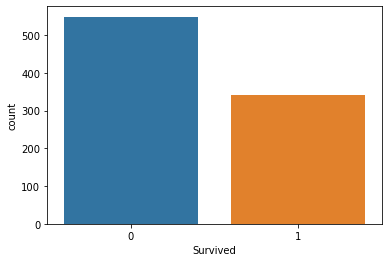

In [9]:
#visualizing the count 
import matplotlib.pyplot as plt
import seaborn as sn
sn.countplot(data["Survived"])
plt.show()

## lets see the count of some categorical and discrete values

In [10]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
categorical_features = [features for features in data.columns if data[features].dtype=="O"]
print(categorical_features)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


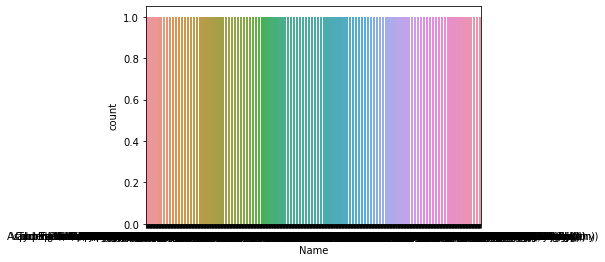

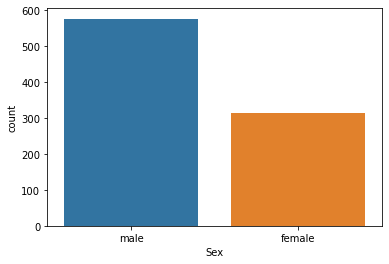

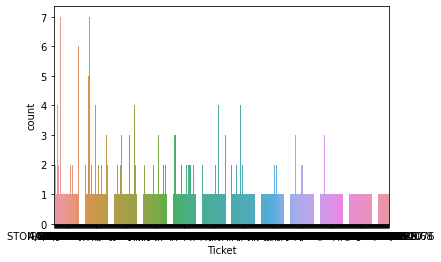

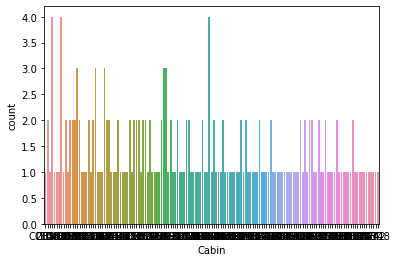

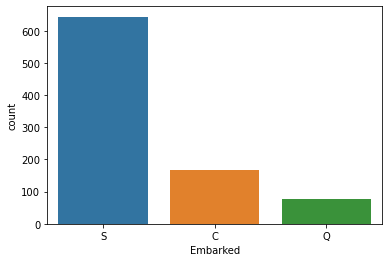

In [12]:
for feature in categorical_features:
    plt.figure()
    sn.countplot(x=feature,
    y=None,
    hue=None,
    data=data,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None)
    plt.show()

In [13]:
##lets check the no of unique values in the categorical features
for feature in categorical_features:
    print("the number of unique values in {} is {}".format(feature,data[feature].nunique()))

the number of unique values in Name is 891
the number of unique values in Sex is 2
the number of unique values in Ticket is 681
the number of unique values in Cabin is 147
the number of unique values in Embarked is 3


# from our observation we can say that the name and ticket columns are not that required for our model so lets drop them

In [14]:
data1 = data.drop(["Name","Ticket"],axis=1)
data1.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [15]:
## it seems like even passenger id is not that required
data1.drop(["PassengerId"],axis=1,inplace=True)

In [16]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

In [17]:
print(data1.shape)

(891, 9)


In [18]:
data1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [19]:
numerical_features = [feature for feature in data1.columns if data1[feature].dtype!="O"]
print(numerical_features)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [20]:
for feature in numerical_features:
    print("the number of unique values in {} is {}".format(feature,data[feature].nunique()))

the number of unique values in Survived is 2
the number of unique values in Pclass is 3
the number of unique values in Age is 88
the number of unique values in SibSp is 7
the number of unique values in Parch is 7
the number of unique values in Fare is 248


In [21]:
## lets find handle the null values
value = data1["Age"].median()
value

28.0

In [22]:
data1["Age"].fillna(value,inplace=True)

In [23]:
data1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [24]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

In [25]:
data1["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [26]:
data1["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
data1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
data1["Embarked"].mode()

0    S
dtype: object

In [29]:
data1["Embarked"].fillna("S",inplace=True)

In [30]:
data1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [31]:
data1["Cabin"].fillna("other",inplace=True)

In [32]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [33]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Cabin Embarked
0         0       3    male  22.0      1      0   7.2500  other        S
1         1       1  female  38.0      1      0  71.2833    C85        C
2         1       3  female  26.0      0      0   7.9250  other        S
3         1       1  female  35.0      1      0  53.1000   C123        S
4         0       3    male  35.0      0      0   8.0500  other        S

In [34]:
data1["Cabin"] = data1["Cabin"].astype(str).str[0]

In [35]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     o        S
1         1       1  female  38.0      1      0  71.2833     C        C
2         1       3  female  26.0      0      0   7.9250     o        S
3         1       1  female  35.0      1      0  53.1000     C        S
4         0       3    male  35.0      0      0   8.0500     o        S

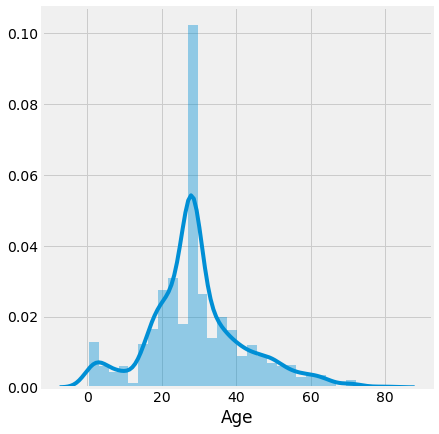

In [36]:
import matplotlib.pyplot as plt
import seaborn as sn
## lets perform some explorative data analysis now
plt.figure(figsize=[7,7])
plt.style.use('fivethirtyeight')
sn.distplot(data1["Age"],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

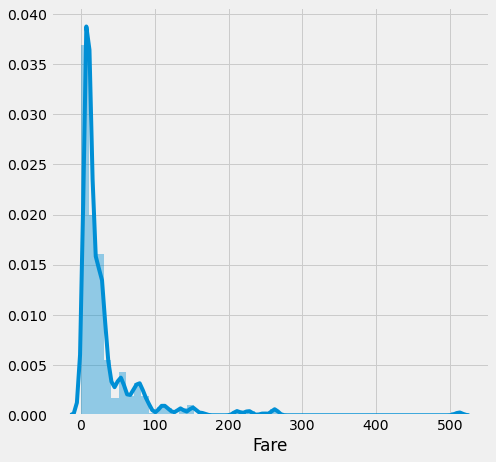

In [37]:
plt.figure(figsize=[7,7])
plt.style.use('fivethirtyeight')
sn.distplot(data1["Fare"],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

In [38]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     o        S
1         1       1  female  38.0      1      0  71.2833     C        C
2         1       3  female  26.0      0      0   7.9250     o        S
3         1       1  female  35.0      1      0  53.1000     C        S
4         0       3    male  35.0      0      0   8.0500     o        S

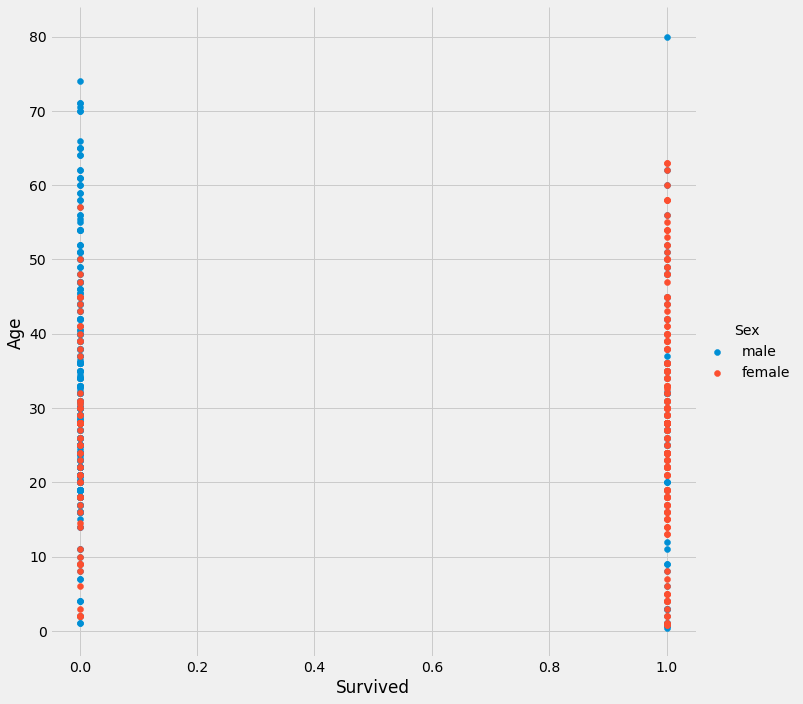

In [39]:
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Sex",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=10,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,"Survived","Age").add_legend()
plt.show()

## from the following we can say that most of the females have survived in the crash

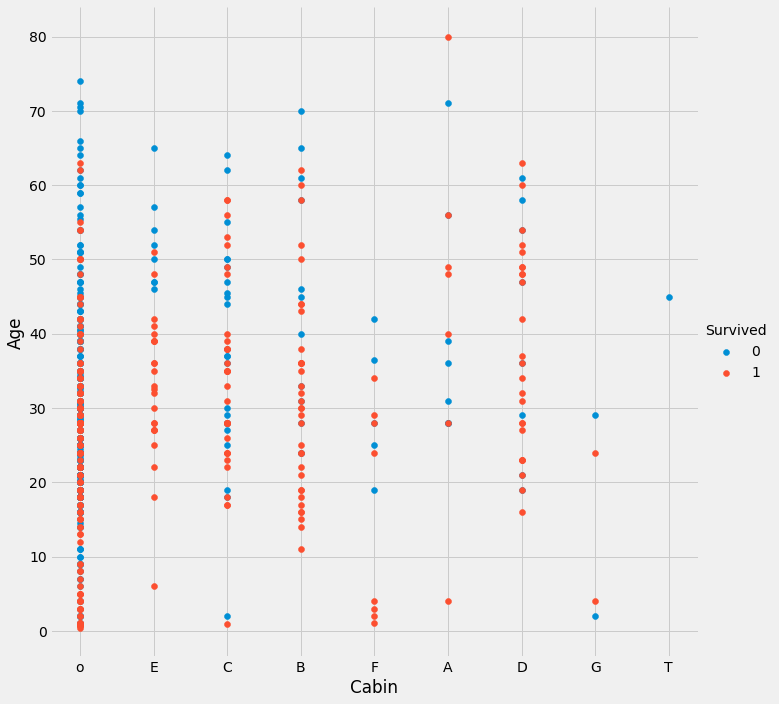

In [40]:
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Survived",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=10,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,"Cabin","Age").add_legend()
plt.show()

In [41]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     o        S
1         1       1  female  38.0      1      0  71.2833     C        C
2         1       3  female  26.0      0      0   7.9250     o        S
3         1       1  female  35.0      1      0  53.1000     C        S
4         0       3    male  35.0      0      0   8.0500     o        S

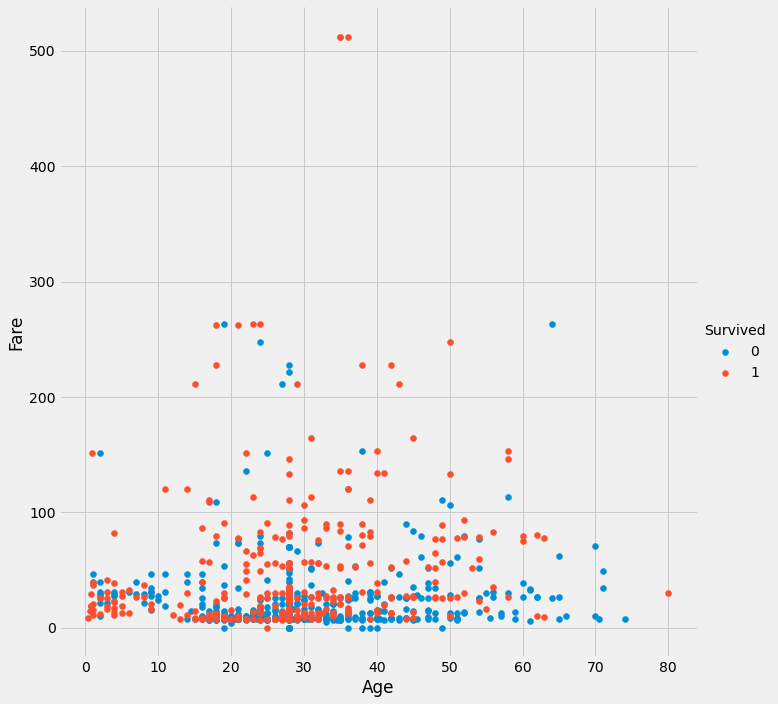

In [42]:
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Survived",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=10,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,"Age","Fare").add_legend()
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

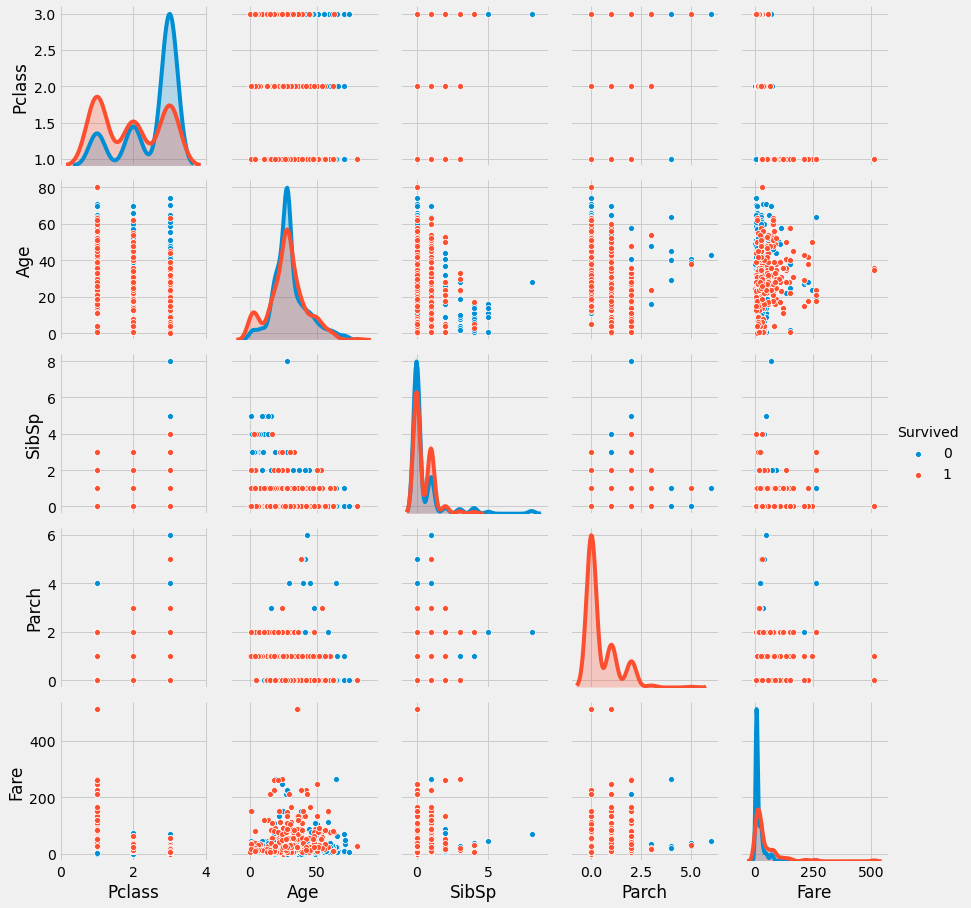

In [43]:
plt.figure(figsize=[20,20])
sn.pairplot(data1,
    hue="Survived",
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None)
plt.show()

In [44]:
data1[["Pclass","Cabin"]]

Pclass Cabin
0         3     o
1         1     C
2         3     o
3         1     C
4         3     o
5         3     o
6         1     E
7         3     o
8         3     o
9         2     o
10        3     G
11        1     C
12        3     o
13        3     o
14        3     o
15        2     o
16        3     o
17        2     o
18        3     o
19        3     o
20        2     o
21        2     D
22        3     o
23        1     A
24        3     o
25        3     o
26        3     o
27        1     C
28        3     o
29        3     o
30        1     o
31        1     B
32        3     o
33        2     o
34        1     o
35        1     o
36        3     o
37        3     o
38        3     o
39        3     o
40        3     o
41        2     o
42        3     o
43        2     o
44        3     o
45        3     o
46        3     o
47        3     o
48        3     o
49        3     o
50        3     o
51        3     o
52        1     D
53        2     o
54        1     B
55        1     C
56        2     o
57        3     o
58        2     o
59        3     o
60        3     o
61        1     B
62        1     C
63        3     o
64        1     o
65        3     o
66        2     F
67        3     o
68        3     o
69        3     o
70        2     o
71        3     o
72        2     o
73        3     o
74        3     o
75        3     F
76        3     o
77        3     o
78        2     o
79        3     o
80        3     o
81        3     o
82        3     o
83        1     o
84        2     o
85        3     o
86        3     o
87        3     o
88        1     C
89        3     o
90        3     o
91        3     o
92        1     E
93        3     o
94        3     o
95        3     o
96        1     A
97        1     D
98        2     o
99        2     o
100       3     o
101       3     o
102       1     D
103       3     o
104       3     o
105       3     o
106       3     o
107       3     o
108       3     o
109       3     o
110       1     C
111       3     o
112       3     o
113       3     o
114       3     o
115       3     o
116       3     o
117       2     o
118       1     B
119       3     o
120       2     o
121       3     o
122       2     o
123       2     E
124       1     D
125       3     o
126       3     o
127       3     o
128       3     F
129       3     o
130       3     o
131       3     o
132       3     o
133       2     o
134       2     o
135       2     o
136       1     D
137       1     C
138       3     o
139       1     B
140       3     o
141       3     o
142       3     o
143       3     o
144       2     o
145       2     o
146       3     o
147       3     o
148       2     F
149       2     o
150       2     o
151       1     C
152       3     o
153       3     o
154       3     o
155       1     o
156       3     o
157       3     o
158       3     o
159       3     o
160       3     o
161       2     o
162       3     o
163       3     o
164       3     o
165       3     o
166       1     E
167       3     o
168       1     o
169       3     o
170       1     B
171       3     o
172       3     o
173       3     o
174       1     A
175       3     o
176       3     o
177       1     C
178       2     o
179       3     o
180       3     o
181       2     o
182       3     o
183       2     F
184       3     o
185       1     A
186       3     o
187       1     o
188       3     o
189       3     o
190       2     o
191       2     o
192       3     o
193       2     F
194       1     B
195       1     B
196       3     o
197       3     o
198       3     o
199       2     o
200       3     o
201       3     o
202       3     o
203       3     o
204       3     o
205       3     G
206       3     o
207       3     o
208       3     o
209       1     A
210       3     o
211       2     o
212       3     o
213       2     o
214       3     o
215       1     D
216       3     o
217       2     o
218       1     D
219       2     o
220       3     o
221      

# if we cleanly observe it we can see that pclass and cabin are one and the same so we can drop pclass

In [45]:
data1.drop("Pclass",axis=1,inplace=True)
data1.head()

Survived     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0    male  22.0      1      0   7.2500     o        S
1         1  female  38.0      1      0  71.2833     C        C
2         1  female  26.0      0      0   7.9250     o        S
3         1  female  35.0      1      0  53.1000     C        S
4         0    male  35.0      0      0   8.0500     o        S

In [46]:
data1["Cabin"].value_counts()

o    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [47]:
values = pd.get_dummies(data1["Cabin"],drop_first=True)

In [48]:
values

B  C  D  E  F  G  T  o
0    0  0  0  0  0  0  0  1
1    0  1  0  0  0  0  0  0
2    0  0  0  0  0  0  0  1
3    0  1  0  0  0  0  0  0
4    0  0  0  0  0  0  0  1
5    0  0  0  0  0  0  0  1
6    0  0  0  1  0  0  0  0
7    0  0  0  0  0  0  0  1
8    0  0  0  0  0  0  0  1
9    0  0  0  0  0  0  0  1
10   0  0  0  0  0  1  0  0
11   0  1  0  0  0  0  0  0
12   0  0  0  0  0  0  0  1
13   0  0  0  0  0  0  0  1
14   0  0  0  0  0  0  0  1
15   0  0  0  0  0  0  0  1
16   0  0  0  0  0  0  0  1
17   0  0  0  0  0  0  0  1
18   0  0  0  0  0  0  0  1
19   0  0  0  0  0  0  0  1
20   0  0  0  0  0  0  0  1
21   0  0  1  0  0  0  0  0
22   0  0  0  0  0  0  0  1
23   0  0  0  0  0  0  0  0
24   0  0  0  0  0  0  0  1
25   0  0  0  0  0  0  0  1
26   0  0  0  0  0  0  0  1
27   0  1  0  0  0  0  0  0
28   0  0  0  0  0  0  0  1
29   0  0  0  0  0  0  0  1
30   0  0  0  0  0  0  0  1
31   1  0  0  0  0  0  0  0
32   0  0  0  0  0  0  0  1
33   0  0  0  0  0  0  0  1
34   0  0  0  0  0  0  0  1
35   0  0  0  0  0  0  0  1
36   0  0  0  0  0  0  0  1
37   0  0  0  0  0  0  0  1
38   0  0  0  0  0  0  0  1
39   0  0  0  0  0  0  0  1
40   0  0  0  0  0  0  0  1
41   0  0  0  0  0  0  0  1
42   0  0  0  0  0  0  0  1
43   0  0  0  0  0  0  0  1
44   0  0  0  0  0  0  0  1
45   0  0  0  0  0  0  0  1
46   0  0  0  0  0  0  0  1
47   0  0  0  0  0  0  0  1
48   0  0  0  0  0  0  0  1
49   0  0  0  0  0  0  0  1
50   0  0  0  0  0  0  0  1
51   0  0  0  0  0  0  0  1
52   0  0  1  0  0  0  0  0
53   0  0  0  0  0  0  0  1
54   1  0  0  0  0  0  0  0
55   0  1  0  0  0  0  0  0
56   0  0  0  0  0  0  0  1
57   0  0  0  0  0  0  0  1
58   0  0  0  0  0  0  0  1
59   0  0  0  0  0  0  0  1
60   0  0  0  0  0  0  0  1
61   1  0  0  0  0  0  0  0
62   0  1  0  0  0  0  0  0
63   0  0  0  0  0  0  0  1
64   0  0  0  0  0  0  0  1
65   0  0  0  0  0  0  0  1
66   0  0  0  0  1  0  0  0
67   0  0  0  0  0  0  0  1
68   0  0  0  0  0  0  0  1
69   0  0  0  0  0  0  0  1
70   0  0  0  0  0  0  0  1
71   0  0  0  0  0  0  0  1
72   0  0  0  0  0  0  0  1
73   0  0  0  0  0  0  0  1
74   0  0  0  0  0  0  0  1
75   0  0  0  0  1  0  0  0
76   0  0  0  0  0  0  0  1
77   0  0  0  0  0  0  0  1
78   0  0  0  0  0  0  0  1
79   0  0  0  0  0  0  0  1
80   0  0  0  0  0  0  0  1
81   0  0  0  0  0  0  0  1
82   0  0  0  0  0  0  0  1
83   0  0  0  0  0  0  0  1
84   0  0  0  0  0  0  0  1
85   0  0  0  0  0  0  0  1
86   0  0  0  0  0  0  0  1
87   0  0  0  0  0  0  0  1
88   0  1  0  0  0  0  0  0
89   0  0  0  0  0  0  0  1
90   0  0  0  0  0  0  0  1
91   0  0  0  0  0  0  0  1
92   0  0  0  1  0  0  0  0
93   0  0  0  0  0  0  0  1
94   0  0  0  0  0  0  0  1
95   0  0  0  0  0  0  0  1
96   0  0  0  0  0  0  0  0
97   0  0  1  0  0  0  0  0
98   0  0  0  0  0  0  0  1
99   0  0  0  0  0  0  0  1
100  0  0  0  0  0  0  0  1
101  0  0  0  0  0  0  0  1
102  0  0  1  0  0  0  0  0
103  0  0  0  0  0  0  0  1
104  0  0  0  0  0  0  0  1
105  0  0  0  0  0  0  0  1
106  0  0  0  0  0  0  0  1
107  0  0  0  0  0  0  0  1
108  0  0  0  0  0  0  0  1
109  0  0  0  0  0  0  0  1
110  0  1  0  0  0  0  0  0
111  0  0  0  0  0  0  0  1
112  0  0  0  0  0  0  0  1
113  0  0  0  0  0  0  0  1
114  0  0  0  0  0  0  0  1
115  0  0  0  0  0  0  0  1
116  0  0  0  0  0  0  0  1
117  0  0  0  0  0  0  0  1
118  1  0  0  0  0  0  0  0
119  0  0  0  0  0  0  0  1
120  0  0  0  0  0  0  0  1
121  0  0  0  0  0  0  0  1
122  0  0  0  0  0  0  0  1
123  0  0  0  1  0  0  0  0
124  0  0  1  0  0  0  0  0
125  0  0  0  0  0  0  0  1
126  0  0  0  0  0  0  0  1
127  0  0  0  0  0  0  0  1
128  0  0  0  0  1  0  0  0
129  0  0  0  0  0  0  0  1
130  0  0  0  0  0  0  0  1
131  0  0  0  0  0  0  0  1
132  0  0  0  0  0  0  0  1
133  0  0  0  0  0  0  0  1
134  0  0  0  0  0  0  0  1
135  0  0  0  0  0  0  0  1
136  0  0  1  0  0  0  0  0
137  0  1  0  0  0  0  0  0
138  0  0  0  0  0  0  0  1
139  1  0  0  0  0  0  0  0
140  0  0  0  0  0  0  0  1
141  0  0  0  0  0  0  0  1
1

In [49]:
data2 = pd.concat([data1,values],axis=1)

In [50]:
data2.head()

Survived     Sex   Age  SibSp  Parch     Fare Cabin Embarked  B  C  D  E  \
0         0    male  22.0      1      0   7.2500     o        S  0  0  0  0   
1         1  female  38.0      1      0  71.2833     C        C  0  1  0  0   
2         1  female  26.0      0      0   7.9250     o        S  0  0  0  0   
3         1  female  35.0      1      0  53.1000     C        S  0  1  0  0   
4         0    male  35.0      0      0   8.0500     o        S  0  0  0  0   

   F  G  T  o  
0  0  0  0  1  
1  0  0  0  0  
2  0  0  0  1  
3  0  0  0  0  
4  0  0  0  1

In [51]:
values1 = pd.get_dummies(data1["Sex"],drop_first=True)
values1

male
0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
30      1
31      0
32      0
33      1
34      1
35      1
36      1
37      1
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      1
47      0
48      1
49      0
50      1
51      1
52      0
53      0
54      1
55      1
56      0
57      1
58      0
59      1
60      1
61      0
62      1
63      1
64      1
65      1
66      0
67      1
68      0
69      1
70      1
71      0
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      0
80      1
81      1
82      0
83      1
84      0
85      0
86      1
87      1
88      0
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      0
99      1
100     0
101     1
102     1
103     1
104     1
105     1
106     0
107     1
108     1
109     0
110     1
111     0
112     1
113     0
114     0
115     1
116     1
117     1
118     1
119     0
120     1
121     1
122     1
123     0
124     1
125     1
126     1
127     1
128     0
129     1
130     1
131     1
132     0
133     0
134     1
135     1
136     0
137     1
138     1
139     1
140     0
141     0
142     0
143     1
144     1
145     1
146     1
147     0
148     1
149     1
150     1
151     0
152     1
153     1
154     1
155     1
156     0
157     1
158     1
159     1
160     1
161     0
162     1
163     1
164     1
165     1
166     0
167     0
168     1
169     1
170     1
171     1
172     0
173     1
174     1
175     1
176     1
177     0
178     1
179     1
180     0
181     1
182     1
183     1
184     0
185     1
186     0
187     1
188     1
189     1
190     0
191     1
192     0
193     1
194     0
195     0
196     1
197     1
198     0
199     0
200     1
201     1
202     1
203     1
204     1
205     0
206     1
207     1
208     0
209     1
210     1
211     0
212     1
213     1
214     1
215     0
216     0
217     1
218     0
219     1
220     1
221     1
222     1
223     1
224     1
225     1
226     1
227     1
228     1
229     0
230     0
231     1
232     1
233     0
234     1
235     0
236     1
237     0
238     1
239     1
240     0
241     0
242     1
243     1
244     1
245     1
246     0
247     0
248     1
249     1
250     1
251     0
252     1
253     1
254     0
255     0
256     0
257     0
258     0
259     0
260     1
261     1
262     1
263     1
264     0
265     1
266     1
267     1
268     0
269     0
270     1
271     1
272     0
273     1
274     0
275     0
276     0
277     1
278     1
279     0
280     1
281     1
282     1
283     1
284     1
285     1
286     1
287     1
288     1
289     0
290     0
291     0
292     1
293     0
294     1
295     1
296     1
297     0
298     1
299     0
300     0
301     1
302     1
303     0
304     1
305     1
306     0
307     0
308     1
309     0
310     0
311     0
312     0
313     1
314     1
315     0
316     0
317     1
318     0
319     0
320     1
321     1
322     0
323     0
324     1
325     0
326     1
327     0
328     0
329     0
330     0
331     1
332     1
333     1
334     0
335     1
336     1
337     0
338     1
339     1
340     1
341     0
342     1
343     1
344     1
345     0
346     0
347     0
348     1
349     1
350     1
351     1
352     1
353     1
354     1
355     1
356     0
357     0
358     0
359     0
360     1
361     1
362     0
363     1
364     1
365     1
366     0
367     0
368     0
369     0
370     1
371     1
372     1
373     1
374     0
375     0
376     0
377     1
378     1
379     1
380     0
381     0
382     1
383     0
384     1
385     1
386     1
387     0
388     1
389     0
390     1
391     1
392     1
393     0
394     0
395     1
396     0
397     1
398     1
399  

In [52]:
data2 = pd.concat([data2,values1],axis=1)
data2.head()

Survived     Sex   Age  SibSp  Parch     Fare Cabin Embarked  B  C  D  E  \
0         0    male  22.0      1      0   7.2500     o        S  0  0  0  0   
1         1  female  38.0      1      0  71.2833     C        C  0  1  0  0   
2         1  female  26.0      0      0   7.9250     o        S  0  0  0  0   
3         1  female  35.0      1      0  53.1000     C        S  0  1  0  0   
4         0    male  35.0      0      0   8.0500     o        S  0  0  0  0   

   F  G  T  o  male  
0  0  0  0  1     1  
1  0  0  0  0     0  
2  0  0  0  1     0  
3  0  0  0  0     0  
4  0  0  0  1     1

In [53]:
values3 = pd.get_dummies(data1[["SibSp","Parch","Embarked"]],drop_first=True)
values3

SibSp  Parch  Embarked_Q  Embarked_S
0        1      0           0           1
1        1      0           0           0
2        0      0           0           1
3        1      0           0           1
4        0      0           0           1
5        0      0           1           0
6        0      0           0           1
7        3      1           0           1
8        0      2           0           1
9        1      0           0           0
10       1      1           0           1
11       0      0           0           1
12       0      0           0           1
13       1      5           0           1
14       0      0           0           1
15       0      0           0           1
16       4      1           1           0
17       0      0           0           1
18       1      0           0           1
19       0      0           0           0
20       0      0           0           1
21       0      0           0           1
22       0      0           1           0
23       0      0           0           1
24       3      1           0           1
25       1      5           0           1
26       0      0           0           0
27       3      2           0           1
28       0      0           1           0
29       0      0           0           1
30       0      0           0           0
31       1      0           0           0
32       0      0           1           0
33       0      0           0           1
34       1      0           0           0
35       1      0           0           1
36       0      0           0           0
37       0      0           0           1
38       2      0           0           1
39       1      0           0           0
40       1      0           0           1
41       1      0           0           1
42       0      0           0           0
43       1      2           0           0
44       0      0           1           0
45       0      0           0           1
46       1      0           1           0
47       0      0           1           0
48       2      0           0           0
49       1      0           0           1
50       4      1           0           1
51       0      0           0           1
52       1      0           0           0
53       1      0           0           1
54       0      1           0           0
55       0      0           0           1
56       0      0           0           1
57       0      0           0           0
58       1      2           0           1
59       5      2           0           1
60       0      0           0           0
61       0      0           0           1
62       1      0           0           1
63       3      2           0           1
64       0      0           0           0
65       1      1           0           0
66       0      0           0           1
67       0      0           0           1
68       4      2           0           1
69       2      0           0           1
70       0      0           0           1
71       5      2           0           1
72       0      0           0           1
73       1      0           0           0
74       0      0           0           1
75       0      0           0           1
76       0      0           0           1
77       0      0           0           1
78       0      2           0           1
79       0      0           0           1
80       0      0           0           1
81       0      0           0           1
82       0      0           1           0
83       0      0           0           1
84       0      0           0           1
85       3      0           0           1
86       1      3           0           1
87       0      0           0           1
88       3      2           0           1
89       0      0           0           1
90       0      0           0           1
91       0      0           0           1
92       1      0           0           1
93       1      2           0           1
94       0     

In [54]:
data2 = pd.concat([data2,values3],axis=1)
data2.head()

Survived     Sex   Age  SibSp  Parch     Fare Cabin Embarked  B  C  ...  E  \
0         0    male  22.0      1      0   7.2500     o        S  0  0  ...  0   
1         1  female  38.0      1      0  71.2833     C        C  0  1  ...  0   
2         1  female  26.0      0      0   7.9250     o        S  0  0  ...  0   
3         1  female  35.0      1      0  53.1000     C        S  0  1  ...  0   
4         0    male  35.0      0      0   8.0500     o        S  0  0  ...  0   

   F  G  T  o  male  SibSp  Parch  Embarked_Q  Embarked_S  
0  0  0  0  1     1      1      0           0           1  
1  0  0  0  0     0      1      0           0           0  
2  0  0  0  1     0      0      0           0           1  
3  0  0  0  0     0      1      0           0           1  
4  0  0  0  1     1      0      0           0           1  

[5 rows x 21 columns]

In [55]:
#now lets drop the categorical columns
data2.drop(["Cabin","Embarked","SibSp","Parch"],axis=1,inplace=True)

In [56]:
data2.head()

Survived     Sex   Age     Fare  B  C  D  E  F  G  T  o  male  Embarked_Q  \
0         0    male  22.0   7.2500  0  0  0  0  0  0  0  1     1           0   
1         1  female  38.0  71.2833  0  1  0  0  0  0  0  0     0           0   
2         1  female  26.0   7.9250  0  0  0  0  0  0  0  1     0           0   
3         1  female  35.0  53.1000  0  1  0  0  0  0  0  0     0           0   
4         0    male  35.0   8.0500  0  0  0  0  0  0  0  1     1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [57]:
data2.drop("Sex",axis=1,inplace=True)
data2

Survived    Age      Fare  B  C  D  E  F  G  T  o  male  Embarked_Q  \
0           0  22.00    7.2500  0  0  0  0  0  0  0  1     1           0   
1           1  38.00   71.2833  0  1  0  0  0  0  0  0     0           0   
2           1  26.00    7.9250  0  0  0  0  0  0  0  1     0           0   
3           1  35.00   53.1000  0  1  0  0  0  0  0  0     0           0   
4           0  35.00    8.0500  0  0  0  0  0  0  0  1     1           0   
5           0  28.00    8.4583  0  0  0  0  0  0  0  1     1           1   
6           0  54.00   51.8625  0  0  0  1  0  0  0  0     1           0   
7           0   2.00   21.0750  0  0  0  0  0  0  0  1     1           0   
8           1  27.00   11.1333  0  0  0  0  0  0  0  1     0           0   
9           1  14.00   30.0708  0  0  0  0  0  0  0  1     0           0   
10          1   4.00   16.7000  0  0  0  0  0  1  0  0     0           0   
11          1  58.00   26.5500  0  1  0  0  0  0  0  0     0           0   
12          0  20.00    8.0500  0  0  0  0  0  0  0  1     1           0   
13          0  39.00   31.2750  0  0  0  0  0  0  0  1     1           0   
14          0  14.00    7.8542  0  0  0  0  0  0  0  1     0           0   
15          1  55.00   16.0000  0  0  0  0  0  0  0  1     0           0   
16          0   2.00   29.1250  0  0  0  0  0  0  0  1     1           1   
17          1  28.00   13.0000  0  0  0  0  0  0  0  1     1           0   
18          0  31.00   18.0000  0  0  0  0  0  0  0  1     0           0   
19          1  28.00    7.2250  0  0  0  0  0  0  0  1     0           0   
20          0  35.00   26.0000  0  0  0  0  0  0  0  1     1           0   
21          1  34.00   13.0000  0  0  1  0  0  0  0  0     1           0   
22          1  15.00    8.0292  0  0  0  0  0  0  0  1     0           1   
23          1  28.00   35.5000  0  0  0  0  0  0  0  0     1           0   
24          0   8.00   21.0750  0  0  0  0  0  0  0  1     0           0   
25          1  38.00   31.3875  0  0  0  0  0  0  0  1     0           0   
26          0  28.00    7.2250  0  0  0  0  0  0  0  1     1           0   
27          0  19.00  263.0000  0  1  0  0  0  0  0  0     1           0   
28          1  28.00    7.8792  0  0  0  0  0  0  0  1     0           1   
29          0  28.00    7.8958  0  0  0  0  0  0  0  1     1           0   
30          0  40.00   27.7208  0  0  0  0  0  0  0  1     1           0   
31          1  28.00  146.5208  1  0  0  0  0  0  0  0     0           0   
32          1  28.00    7.7500  0  0  0  0  0  0  0  1     0           1   
33          0  66.00   10.5000  0  0  0  0  0  0  0  1     1           0   
34          0  28.00   82.1708  0  0  0  0  0  0  0  1     1           0   
35          0  42.00   52.0000  0  0  0  0  0  0  0  1     1           0   
36          1  28.00    7.2292  0  0  0  0  0  0  0  1     1           0   
37          0  21.00    8.0500  0  0  0  0  0  0  0  1     1           0   
38          0  18.00   18.0000  0  0  0  0  0  0  0  1     0           0   
39          1  14.00   11.2417  0  0  0  0  0  0  0  1     0           0   
40          0  40.00    9.4750  0  0  0  0  0  0  0  1     0           0   
41          0  27.00   21.0000  0  0  0  0  0  0  0  1     0           0   
42          0  28.00    7.8958  0  0  0  0  0  0  0  1     1           0   
43          1   3.00   41.5792  0  0  0  0  0  0  0  1     0           0   
44          1  19.00    7.8792  0  0  0  0  0  0  0  1     0           1   
45          0  28.00    8.0500  0  0  0  0  0  0  0  1     1           0   
46          0  28.00   15.5000  0  0  0  0  0  0  0  1     1           1   
47          1  28.00    7.7500  0  0  0  0  0  0  0  1     0           1   
48          0  28.00   21.6792  0  0  0  0  0  0  0  1     1           0   
49          0  18.00   17.8000  0  0  0  0  0  0  0  1     0           0   
50          0   7.00   39.6875  0  0  0  0  0  0  0  1     1           0   
51          0  21.00    7.8000  0  0  0  0  0  0  0  

# Now lets divide model into independent and dependent variables

In [58]:
#independent variables
x = data2.drop("Survived",axis=1)
#dependent variable
y = data2["Survived"]

In [59]:
print(x.shape,y.shape)

(891, 13) (891,)


In [60]:
x.isnull().sum()

Age           0
Fare          0
B             0
C             0
D             0
E             0
F             0
G             0
T             0
o             0
male          0
Embarked_Q    0
Embarked_S    0
dtype: int64

# now lets see whether our dependent is balanced or imbalanced

## What is balanced and imbalanced data set

### Balanced dataset:A dataset having having both the yes and no almost equally or they varies in a slight amount
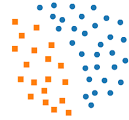

### Balanced dataset:A dataset having having both the yes and no almost equally or they varies in a  such a way that one values completely dominates the other because of this our algorithm get biases towards that value
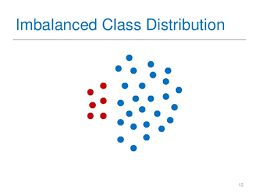

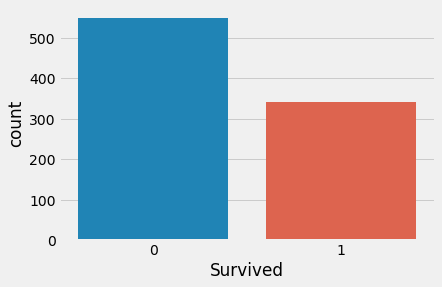

In [61]:
sn.countplot( x=y,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.7,
    dodge=False,
    ax=None)

# from the above graph we can say that the data set is balanced

# Now our data is clean and ready for a machine learning algorithm to be applied

## What is machine learning?
    * Machine learning is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence.

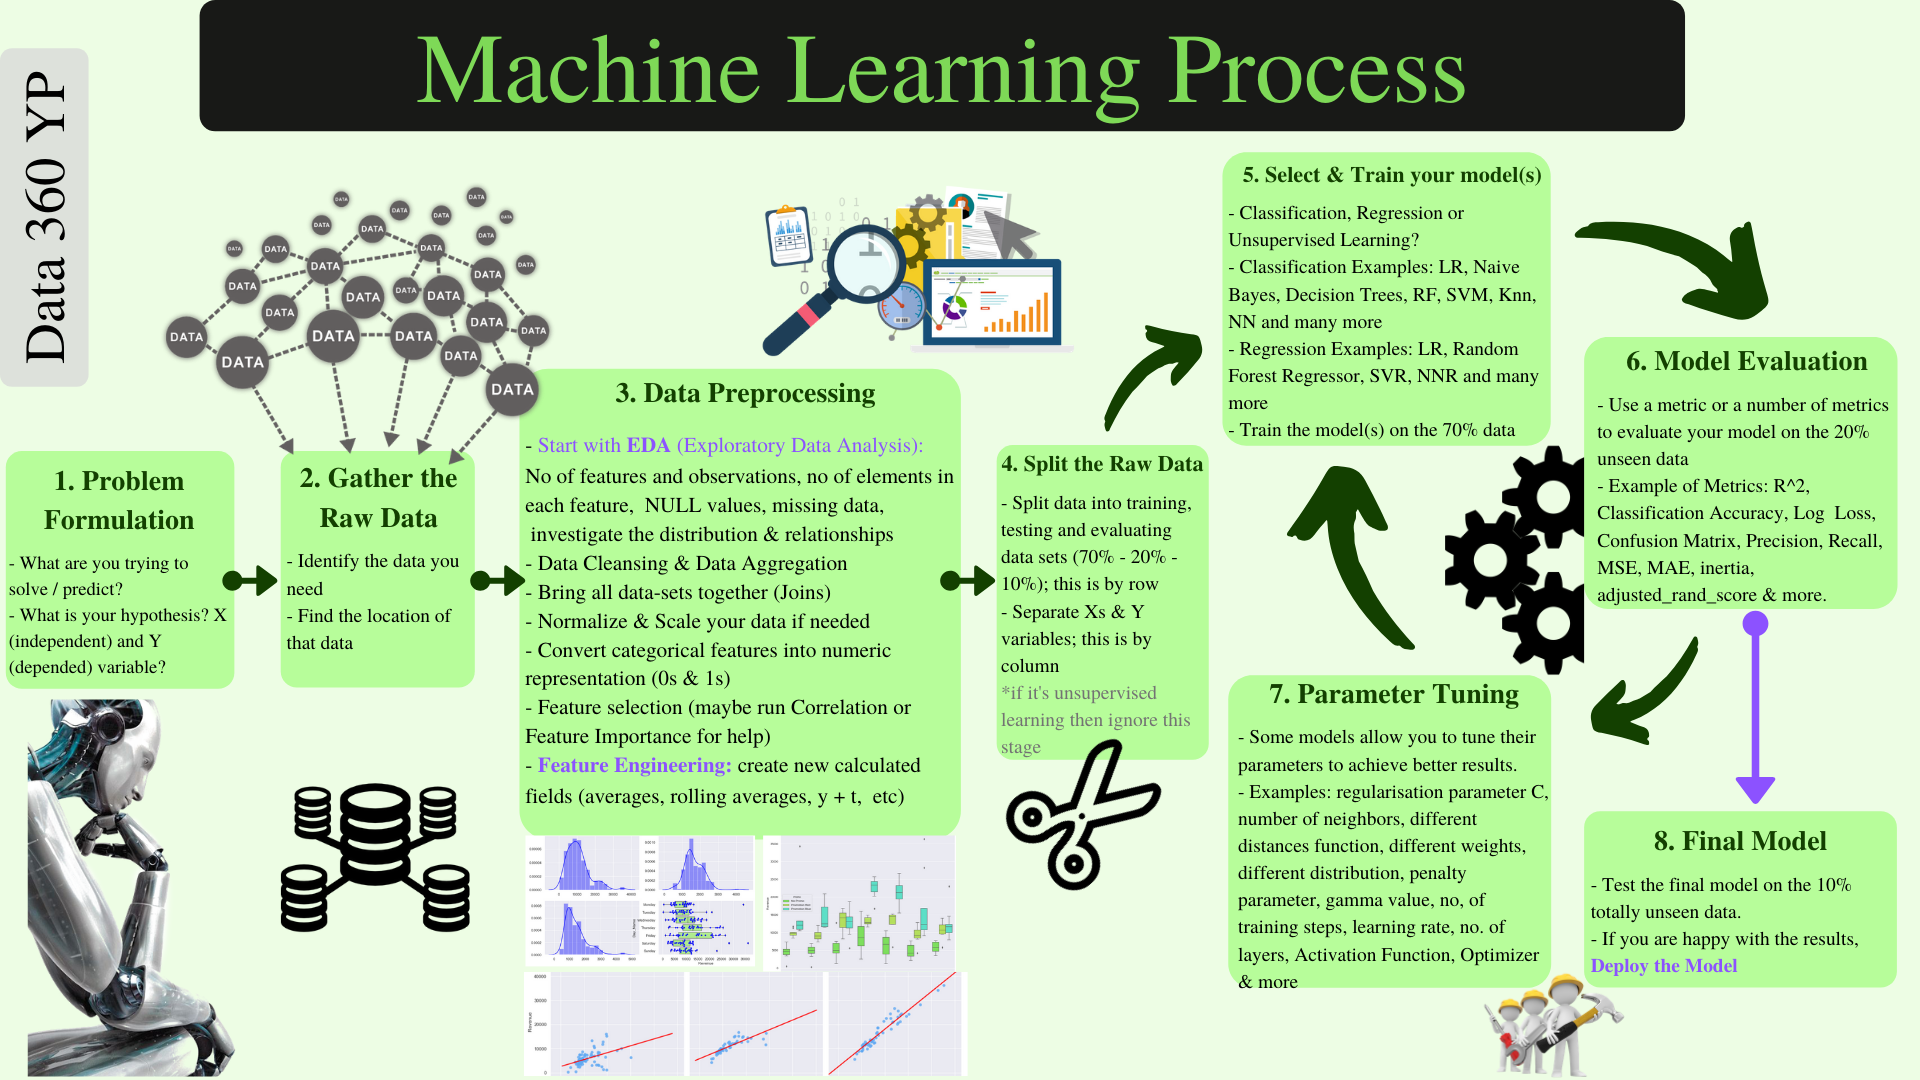

# from our data set we can say that our problem is a classification problem

## There are many algorithms for classification Like:
     
## 1.Logistic Regression

## 2.Decison Tree Classifier

## 3.Random Forest Classifier

## 4.Support Vector machine Classifier

## but lets confine to Decision Tree Classifier for now

# what is Decison Tree?
1. Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

2. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

3. The decisions or the test are performed on the basis of features of the given dataset.
4. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
5. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
6. In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
7. A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
Below diagram explains the general structure of a decision tree:
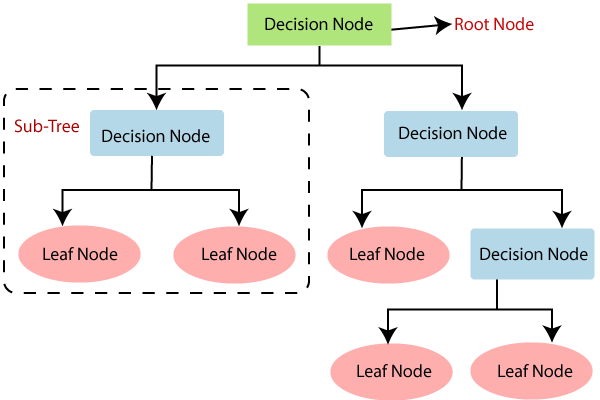

https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm 

## for more details understanding of Decision Tress refer the the above link

In [62]:
## now lests check for outliers
x.head()

Age     Fare  B  C  D  E  F  G  T  o  male  Embarked_Q  Embarked_S
0  22.0   7.2500  0  0  0  0  0  0  0  1     1           0           1
1  38.0  71.2833  0  1  0  0  0  0  0  0     0           0           0
2  26.0   7.9250  0  0  0  0  0  0  0  1     0           0           1
3  35.0  53.1000  0  1  0  0  0  0  0  0     0           0           1
4  35.0   8.0500  0  0  0  0  0  0  0  1     1           0           1

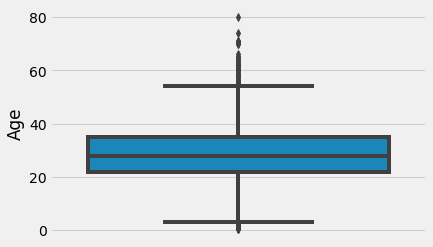

In [63]:
sn.boxplot( x=None,
    y="Age",
    hue=None,
    data=x,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None)

In [64]:
x[x["Age"]>60].shape

(22, 13)

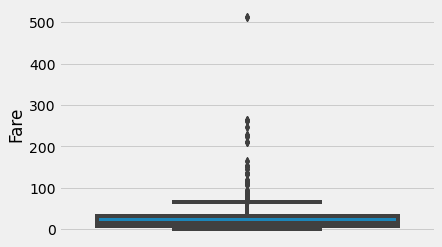

In [65]:
sn.boxplot( x=None,
    y="Fare",
    hue=None,
    data=x,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None)

In [66]:
x[x["Fare"]>100].shape

(53, 13)

In [67]:
# now lets split our data into training into testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 13)
(223, 13)
(668,)
(223,)


In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
train_predict = model.predict(x_train)
print("the score on training dataset is {}".format(model.score(x_train,y_train)))

the score on training dataset is 0.9820359281437125


In [71]:
test_predict = model.predict(x_test)
print("the score on training dataset is {}".format(model.score(x_test,y_test)))

the score on training dataset is 0.8161434977578476


# we can clearly fin that our model is being underfitted

## Inorder to understand this we have to know about these terms:
###  1.Bias
###  2.Variance

### Bias:Bias is the simplifying assumptions made by the model to make the target function easier to approximate.

### Variance: Variance is the amount that the estimate of the target function will change given different training data.

### Underfitting:
* A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have less data to build an accurate model and also when we try to build a linear model with a non-linear data. In such cases the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection.

### In a nutshell, Underfitting – High bias and low variance

### Techniques to reduce underfitting :
1. Increase model complexity
2. Increase number of features, performing feature engineering
3. Remove noise from the data.
4. Increase the number of epochs or increase the duration of training to get better results.

### Overfitting:
* A statistical model is said to be overfitted, when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees.

### In a nutshell, Overfitting – High variance and low bias



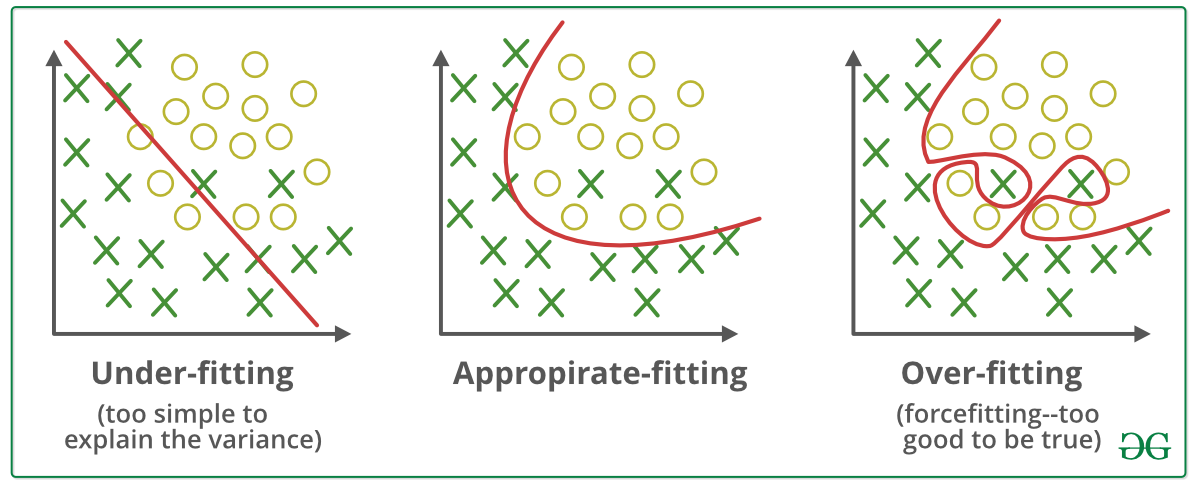

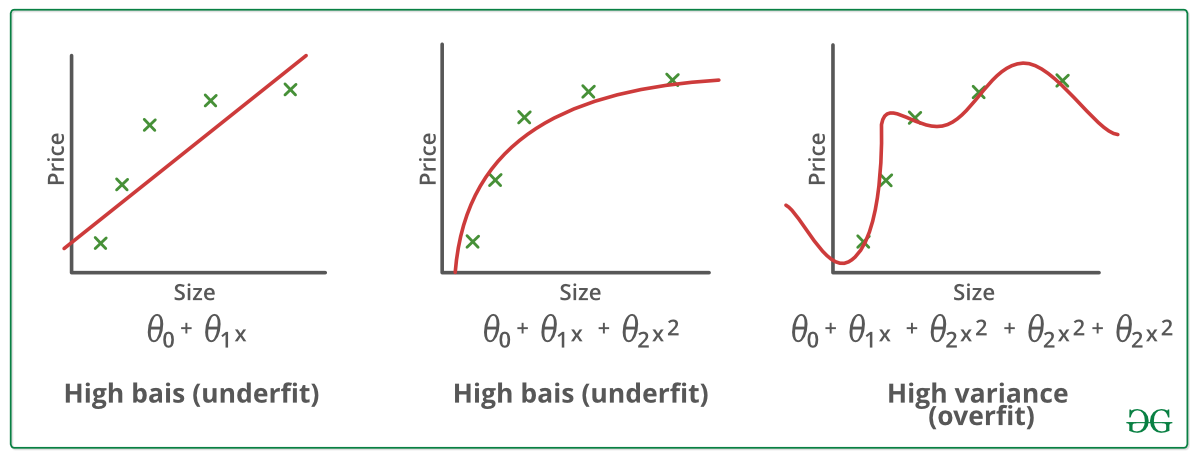

# lets perform some hyper parameter tuning and selects best features to make our model more generalized

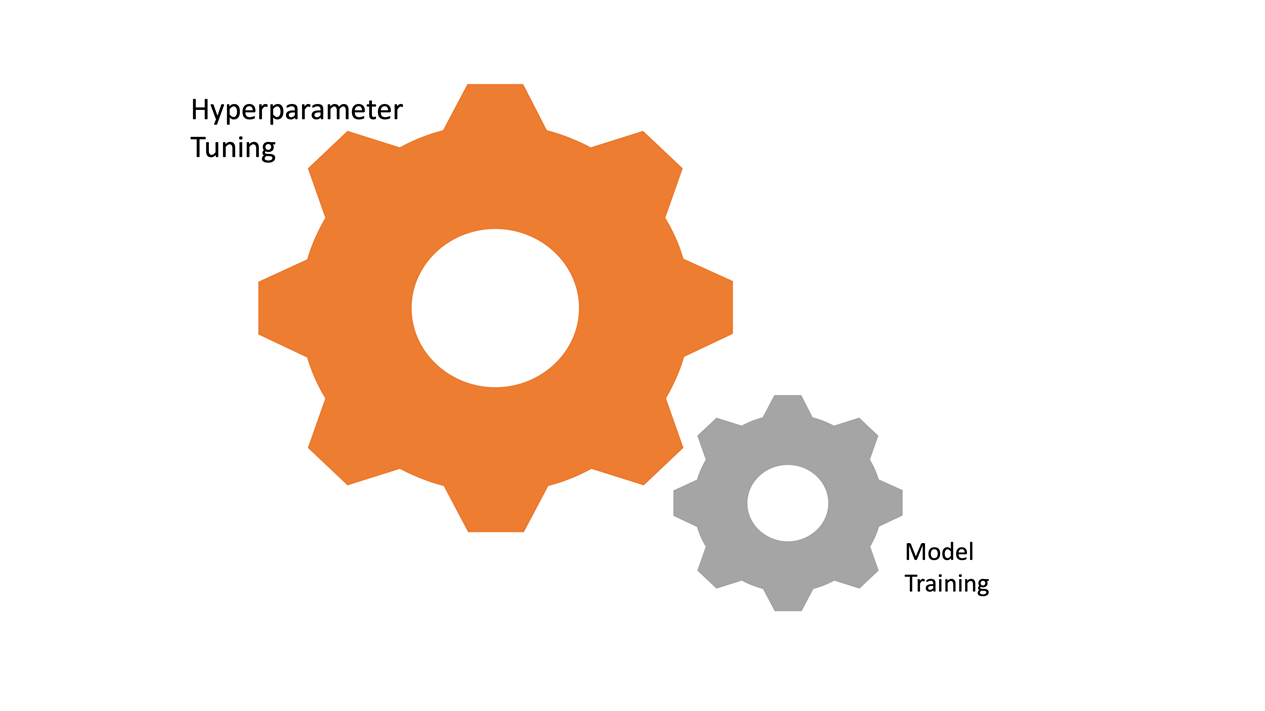

In [72]:
#first lets visualize our actual and predict values
visualize = pd.DataFrame({'train_actual':y_train,'train_predicted':train_predict}).reset_index()
visualize

index  train_actual  train_predicted
0      578             0                0
1      323             1                1
2      654             0                0
3      157             0                0
4      692             1                0
5      567             0                0
6      700             1                1
7      379             0                0
8      704             0                0
9      564             0                0
10     424             0                0
11      35             0                0
12     441             0                0
13     778             0                0
14     651             1                1
15      37             0                0
16     399             1                1
17     779             1                1
18     716             1                1
19     172             1                1
20      30             0                0
21     509             1                1
22     497             0                0
23      99             0                0
24      78             1                1
25     132             0                0
26      87             0                0
27     611             0                0
28     846             0                0
29     735             0                0
30     398             0                0
31     334             1                1
32     237             1                1
33     555             0                0
34     524             0                0
35     389             1                1
36     175             0                0
37     507             1                1
38     643             1                0
39     161             1                1
40     318             1                1
41     863             0                0
42     254             0                0
43     396             0                0
44     358             1                1
45       7             0                0
46     765             1                1
47     339             0                0
48     374             0                0
49     183             1                1
50     625             0                0
51     102             0                0
52     610             0                0
53      56             1                1
54     831             1                1
55      33             0                0
56     126             0                0
57     641             1                1
58      60             0                0
59     479             1                1
60     604             1                1
61     184             1                1
62     588             0                0
63     501             0                0
64     799             0                0
65     262             0                0
66     295             0                0
67     499             0                0
68     642             0                0
69      20             0                0
70     220             1                0
71     322             1                1
72     463             0                0
73     159             0                0
74      47             1                1
75     402             0                0
76     618             1                1
77     278             0                0
78     744             1                1
79     448             1                1
80     769             0                0
81     605             0                0
82     169             0                0
83     737             1                1
84     410             0                0
85     626             0                0
86     437             1                1
87     698             0                0
88     349             0                0
89     115             0                0
90     615             1                1
91      24             0                0
92     483             1                1
93     438             0                0
94      65     

In [73]:
visualize_test = pd.DataFrame({'test_actual':y_test,'test_predicted':test_predict}).reset_index()
visualize_test

index  test_actual  test_predicted
0      590            0               0
1      131            0               0
2      628            0               0
3      195            1               0
4      230            1               1
5      646            0               0
6       75            0               0
7      586            0               0
8      569            1               0
9      287            0               0
10     666            0               0
11      43            1               1
12     600            1               1
13     284            0               1
14     242            0               0
15     466            0               0
16     176            0               0
17     171            0               0
18     729            0               0
19     522            0               0
20     639            0               0
21     292            0               0
22     518            1               1
23     442            0               1
24     731            0               1
25     876            0               0
26     840            0               0
27     445            1               1
28     695            0               0
29       1            1               1
30     383            1               1
31     277            0               0
32     419            0               0
33     104            0               0
34      22            1               1
35     667            0               1
36     293            0               1
37      27            0               0
38     260            0               0
39     579            1               0
40     153            0               0
41     637            0               1
42     739            0               0
43      68            1               0
44     712            1               0
45     782            0               1
46     408            0               1
47     173            0               0
48     329            1               1
49      92            0               0
50     248            1               1
51     217            0               1
52     847            0               0
53     599            1               1
54     407            1               1
55     307            1               1
56      16            0               0
57     367            1               1
58     299            1               1
59     565            0               0
60     703            0               0
61      52            1               1
62     264            0               1
63     617            0               1
64     851            0               0
65     834            0               0
66     361            0               0
67     814            0               0
68     758            0               0
69     726            1               0
70     791            0               0
71     845            0               0
72     271            1               0
73     326            0               0
74     190            1               1
75     138            0               0
76     833            0               0
77     261            1               0
78      64            0               0
79     843            0               0
80     403            0               0
81     613            0               0
82     120            0               0
83     305            1               1
84     345            1               1
85     722            0               0
86     581            1               1
87     177            0               1
88     418            0               0
89     417            1               1
90     429            1               0
91     629            0               0
92     351            0               1
93      45            0               0
94     577            1               1
95     235            0               1
96     192            1               0
97     768            0               0
98     781            1               1
99   

In [74]:
model2 = DecisionTreeClassifier( criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0)
model2.fit(x_train,y_train)

DecisionTreeClassifier()

# We can see that sklearn takes some default values lets play with them inorder to get a generalized model

In [75]:
scores_test = []
scores_train = []
parameter_value = []
for i in range(1,20):
    model2 = DecisionTreeClassifier(max_depth=i)
    model2.fit(x_train,y_train)
    score_test = model2.score(x_test,y_test)
    score_train = model2.score(x_train,y_train)
    scores_test.append(score_test)
    scores_train.append(score_train)
    parameter_value.append(i)

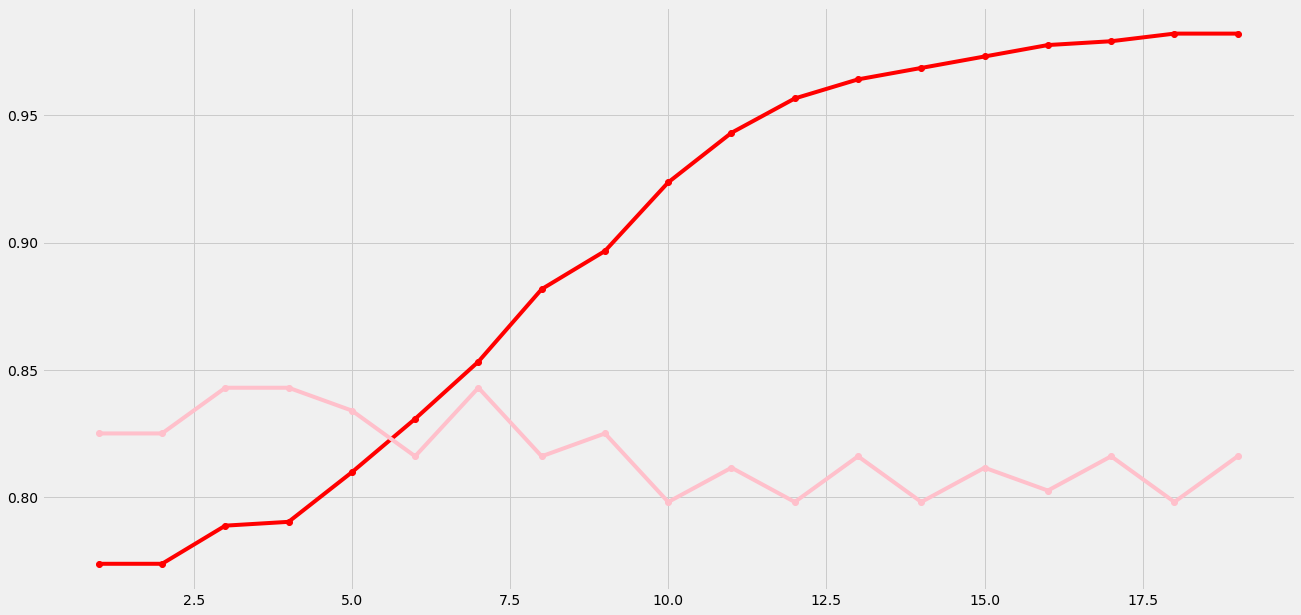

In [76]:
##lets visualize them
plt.figure(figsize=[20,10])
plt.plot(parameter_value,scores_train,marker='o',color="red")
plt.plot(parameter_value,scores_test,marker='o',color="pink")
plt.show()

In [77]:
scores_test2 = []
scores_train2 = []
parameter_value2 = []
for i in range(2,20):
    model2 = DecisionTreeClassifier(max_depth=9, min_samples_split=i,)
    model2.fit(x_train,y_train)
    score_test2 = model2.score(x_test,y_test)
    score_train2 = model2.score(x_train,y_train)
    scores_test2.append(score_test2)
    scores_train2.append(score_train2)
    parameter_value2.append(i)

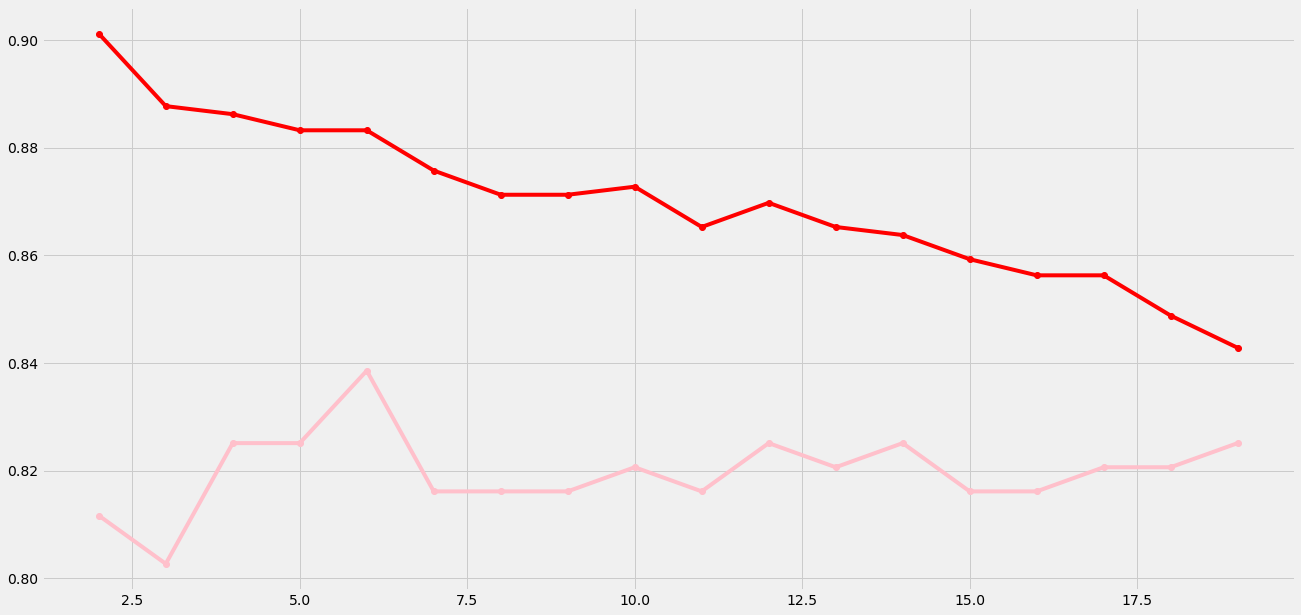

In [78]:
plt.figure(figsize=[20,10])
plt.plot(parameter_value2,scores_train2,marker='o',color="red")
plt.plot(parameter_value2,scores_test2,marker='o',color="pink")
plt.show()

In [79]:
scores_test4 = []
scores_train4 = []
parameter_value4 = []
for i in range(1,20):
    model2 = DecisionTreeClassifier(max_depth=9,random_state=i,)
    model2.fit(x_train,y_train)
    score_test4 = model2.score(x_test,y_test)
    score_train4 = model2.score(x_train,y_train)
    scores_test4.append(score_test4)
    scores_train4.append(score_train4)
    parameter_value4.append(i)

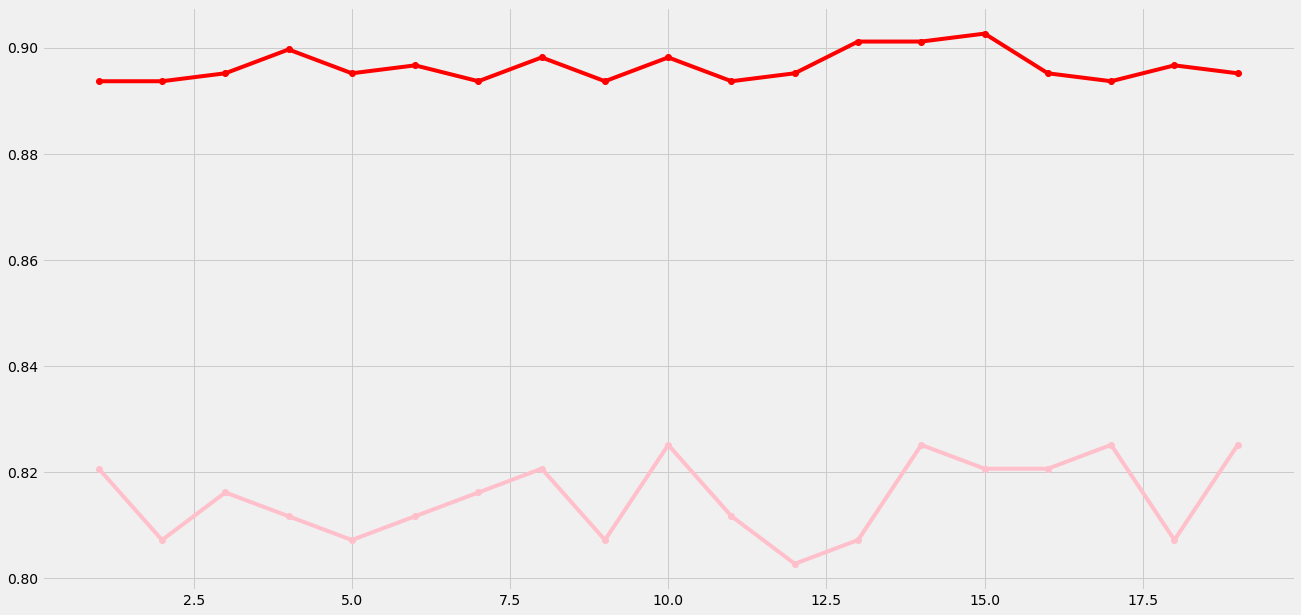

In [80]:
plt.figure(figsize=[20,10])
plt.plot(parameter_value4,scores_train4,marker='o',color="red")
plt.plot(parameter_value4,scores_test4,marker='o',color="pink")
plt.show()

In [81]:
scores_test5 = []
scores_train5 = []
parameter_value5 = []
for i in range(2,30):
    model2 = DecisionTreeClassifier(max_depth=9,random_state=10, max_leaf_nodes=i)
    model2.fit(x_train,y_train)
    score_test5 = model2.score(x_test,y_test)
    score_train5 = model2.score(x_train,y_train)
    scores_test5.append(score_test5)
    scores_train5.append(score_train5)
    parameter_value5.append(i)

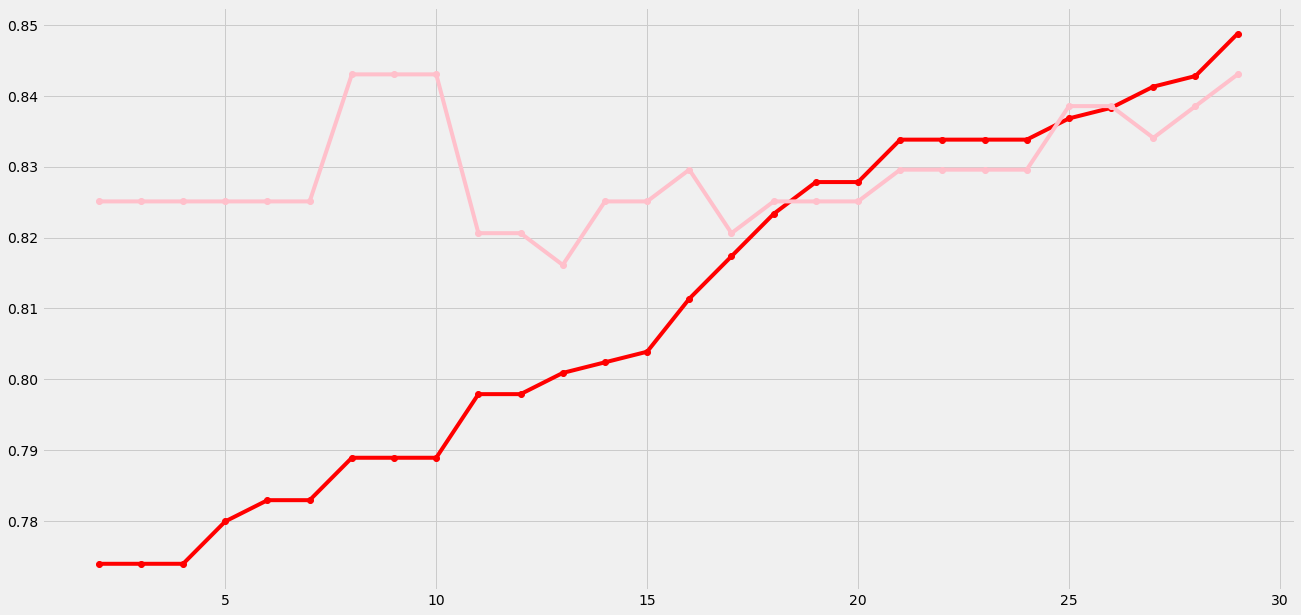

In [82]:
plt.figure(figsize=[20,10])
plt.plot(parameter_value5,scores_train5,marker='o',color="red")
plt.plot(parameter_value5,scores_test5,marker='o',color="pink")
plt.show()

In [83]:
model3 = DecisionTreeClassifier(max_depth=9,random_state=10, max_leaf_nodes=28)
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=28, random_state=10)

In [84]:
train_predict = model3.predict(x_train)
print("the score on training dataset is {}".format(model3.score(x_train,y_train)))

the score on training dataset is 0.842814371257485


In [85]:
test_predict = model3.predict(x_test)
print("the score on testing dataset is {}".format(model3.score(x_test,y_test)))

the score on testing dataset is 0.8385650224215246


In [86]:
train_prediction = model3.predict(x_train)
test_prediction = model3.predict(x_test)

In [87]:
#lets evaluate our model for training data
from sklearn.metrics import classification_report
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       402
           1       0.86      0.72      0.78       266

    accuracy                           0.84       668
   macro avg       0.85      0.82      0.83       668
weighted avg       0.84      0.84      0.84       668



In [88]:
#lets evaluate our model for testing data
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       147
           1       0.80      0.70      0.75        76

    accuracy                           0.84       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.84      0.84      0.84       223



In [89]:
## lets plot a confusion matrix to see the predictions
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train,train_predict)
matrix

array([[372,  30],
       [ 75, 191]], dtype=int64)

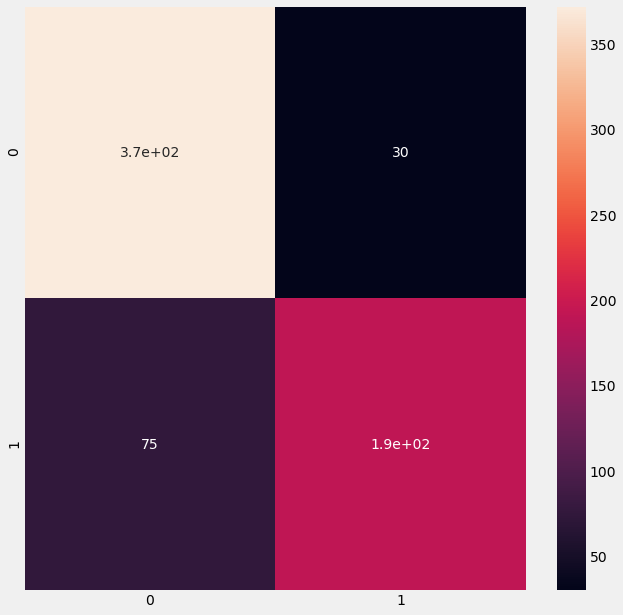

In [90]:
#plot using heat map
plt.figure(figsize=[10,10])
sn.heatmap(matrix,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None)

In [91]:
#lets plot confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(y_test,test_predict)
matrix1

array([[134,  13],
       [ 23,  53]], dtype=int64)

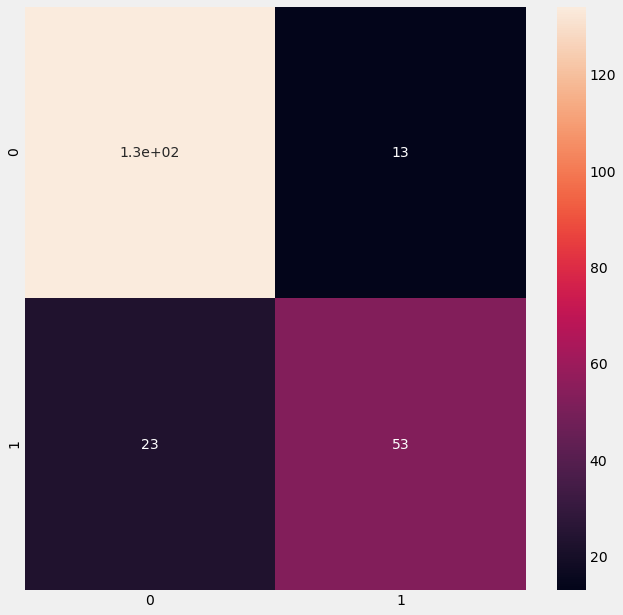

In [92]:
plt.figure(figsize=[10,10])
sn.heatmap(matrix1,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None)

In [93]:
from sklearn import tree
plot = tree.export_graphviz(model3,
    out_file='tree.dot',
    max_depth=3,
    feature_names=x_train.columns,
    class_names=None,
    label='all',
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=False,
    rounded=False,
    special_characters=False,
    precision=3)

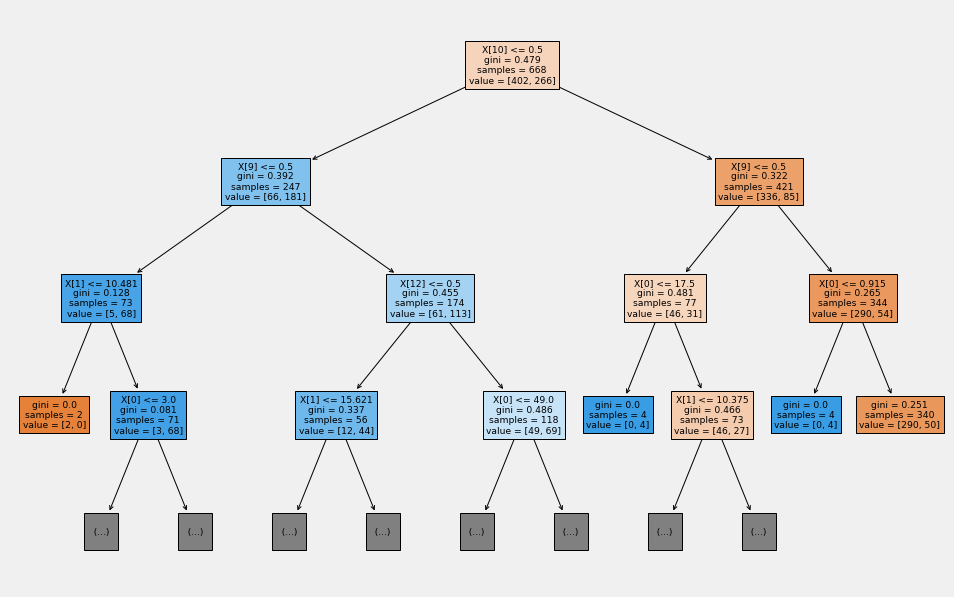

In [94]:
plt.figure(figsize=[15,10])
plt.style.use('default')
tree.plot_tree(model3,filled=True,max_depth=3)
plt.show()

In [95]:
tree.export_text(model3,)

'|--- feature_10 <= 0.50\n|   |--- feature_9 <= 0.50\n|   |   |--- feature_1 <= 10.48\n|   |   |   |--- class: 0\n|   |   |--- feature_1 >  10.48\n|   |   |   |--- feature_0 <= 3.00\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_0 >  3.00\n|   |   |   |   |--- class: 1\n|   |--- feature_9 >  0.50\n|   |   |--- feature_12 <= 0.50\n|   |   |   |--- feature_1 <= 15.62\n|   |   |   |   |--- feature_1 <= 14.16\n|   |   |   |   |   |--- feature_1 <= 6.99\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- feature_1 >  6.99\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_1 >  14.16\n|   |   |   |   |   |--- class: 0\n|   |   |   |--- feature_1 >  15.62\n|   |   |   |   |--- class: 1\n|   |   |--- feature_12 >  0.50\n|   |   |   |--- feature_0 <= 49.00\n|   |   |   |   |--- feature_1 <= 9.84\n|   |   |   |   |   |--- feature_1 <= 7.70\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_1 >  7.70\n|   |   |   |   |   |   |--- clas

In [96]:
testing = pd.read_csv("test.csv")
testing.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [97]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64